In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
# from sklearn.trees import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None 

In [2]:

df = pd.read_csv("traffic.csv",parse_dates=True, index_col='DateTime')


# extract year from date
df['Year'] = pd.Series(df.index).apply(lambda x: x.year).to_list()

# extract month from date
df['Month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()

# extract day from date
df['Day'] = pd.Series(df.index).apply(lambda x: x.day).to_list()

# extract hour from date
df['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()
df["Series"] = [1]*len(df)
# grouped = df.groupby(df.Junction)
# df1 = grouped.get_group(1)
# df2 = grouped.get_group(2)
# df3 = grouped.get_group(3)
# df4 = grouped.get_group(4)

for index, row in df.iterrows():
    row["Series"]=index.dayofyear
df

,Junction,Vehicles,ID,Year,Month,Day,Hour,Series
DateTime,,,,,,,,
2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,305
2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,305
2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,305
2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,305
2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,305
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,181
2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,181
2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,181


In [3]:
# print(df)


X = df[["Junction", 'Year',  'Series' ,'Hour']].values.tolist()
y = sk.utils.validation.column_or_1d(df[["Vehicles"]].values.tolist())
# print(x1)
# print(x2)
# from sklearn import preprocessing
# import numpy as np
# x2 = preprocessing.normalize([x2])[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43,train_size=0.8)
# x1Train, x1Test, x2Train, x2Test = x1[:dataDivide], x1[
#     dataDivide:], x2[:dataDivide], x2[dataDivide:]

In [4]:
y_train

array([ 57,   6,   8, ...,  31,  11, 122])

In [5]:
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(X_train, y_train)

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

clf = make_pipeline(StandardScaler(), SVR())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [7]:
# model = SVC(random_state=1)
# model.fit(x1Train, x2Train)
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
clf1 = make_pipeline(StandardScaler(), RandomForestRegressor())
clf1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [8]:
# print(rf.score(X_test, y_test))
print(clf1.score(X_test, y_test))
print(clf.score(X_test, y_test))
# print(clf1.predict(X_test))
# print(clf.predict([[4, 2017, 4, 17, 16]]))

0.956102660239957
0.8237075364902094


In [9]:
df2017_j1 = df[(df.index > '2016-1-1') & (df.index <= '2017-1-1') & (df["Junction"] == 1)]
df2017_j1["Year"] +=0
df2017_j1["Junction"] = [1]*8784

X1 = df2017_j1[["Junction", 'Year',  'Series' , 'Hour']].values.tolist()
df2017_j2 = df[(df.index > '2016-1-1') & (df.index <= '2017-1-1') & (df["Junction"] == 1)]
df2017_j2["Year"] = [2017]*8784
df2017_j2["Junction"] = [2]*8784

X2 = df2017_j2[["Junction", 'Year',  'Series' , 'Hour']].values.tolist()
df2017_j3 = df[(df.index > '2016-1-1') & (df.index <= '2017-1-1') & (df["Junction"] == 1)]
df2017_j3["Year"] = [2017]*8784
df2017_j3["Junction"] = [3]*8784

X3 = df2017_j3[["Junction", 'Year',  'Series' , 'Hour']].values.tolist()
df2017_j4 = df[(df.index > '2016-1-1') & (df.index <= '2017-1-1') & (df["Junction"] == 1)]
df2017_j4["Year"] = [2017]*8784
df2017_j4["Junction"] = [4]*8784
X4 = df2017_j4[["Junction", 'Year',  'Series' , 'Hour']].values.tolist()

a1 = (clf.predict(X1))
# a2 = (clf.predict(X2))
# a3 = (clf.predict(X3))
# a4 = (clf.predict(X4))



In [10]:
ans = df[(df.index > '2016-1-1') & (df.index <= '2017-1-1') & (df["Junction"] == 1)]
ans = sk.utils.validation.column_or_1d(ans[["Vehicles"]].values.tolist())
print(ans)
a1 = [round(x) for x in a1]

[13 11  6 ... 33 32 27]


8784 8784


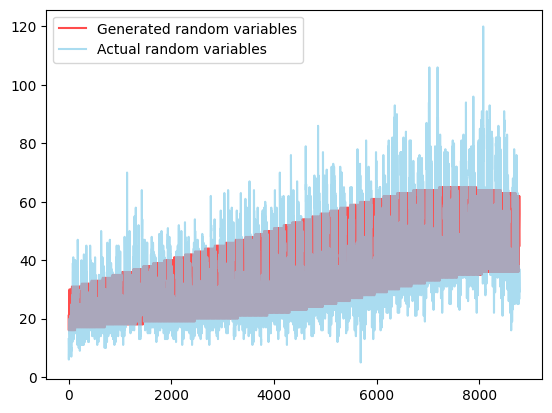

In [11]:
print(len(a1),len(ans))
import matplotlib.pyplot as plt


plt.plot(a1,
            alpha=0.7,
            color="red",
            label="Generated random variables",)

plt.plot(ans,
            alpha=0.7,
            color="skyblue",
            label="Actual random variables")

# plt.title(f"Generated vs Actual {n} Exponential Random Variables")
plt.legend()
plt.show()

In [12]:
# df2017_j1 = pd.date_range(start='1/1/2017', end='1/01/2018',freq="1H")
# df2017_j1 = pd.DataFrame({"date":df2})
# df2017_j1["Junction"] = [1]*len(df2)

# df2017_j2 = pd.date_range(start='1/1/2017', end='1/01/2018',freq="1H")
# df2017_j2 = pd.DataFrame({"date":df2})
# df2017_j2["Junction"] = [2]*len(df2)

# df2017_j3 = pd.date_range(start='1/1/2017', end='1/01/2018',freq="1H")
# df2017_j3 = pd.DataFrame({"date":df2})
# df2017_j3["Junction"] = [3]*len(df2)

# df2017_j4 = pd.date_range(start='1/1/2017', end='1/01/2018',freq="1H")
# df2017_j4 = pd.DataFrame({"date":df2})
# df2017_j4["Junction"] = [4]*len(df2)


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from scipy.special import huber
import tensorflow as tf
print("MAE:",mean_absolute_error( ans,a1))
print("MSE:",mean_squared_error( ans,a1))
print("RMSE:",mean_squared_error( ans,a1,squared=False))
print("MAPE:",mean_absolute_percentage_error( ans,a1))
huberLoss = tf.keras.losses.Huber()
print("HuberLoss:",huberLoss(ans, a1).numpy())

7.652436247723133
104.12921220400729
10.204372210185557
0.21469413642730972
7.179303
